## Environment Setup

The notebook has been coded to run in Google Colab environment for a computer vision project using a dataset of butterfly images.  
1. Copy this notebook into a Colab session
2. Fork the github repo into your own github repo
2. Update API keys for Git and Kaggle in the Colab "Secrets" menu
3. Run the cells to perform the training


In [1]:
# Git set up and cloning of repo into runtime session

import os

from google.colab import userdata
GITHUB_TOKEN = userdata.get('GITHUB_TOKEN')

# update inputs for your own repo fork
os.environ['USER'] = 'pbeasly'
os.environ['REPO'] = 'computer-vision-butterflies'
os.environ['TOKEN'] = GITHUB_TOKEN

# do everything in colab's "root" directory
%cd /content

!git clone https://${TOKEN}@github.com/${USER}/${REPO}.git

# Change to the cloned repo directory
%cd /content/computer-vision-butterflies

# The working directory should contain: data_loader.py  main.ipynb  models.py  README.md  runs/  trainer.py
%ls

/content
Cloning into 'computer-vision-butterflies'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 82 (delta 37), reused 53 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 1.05 MiB | 29.88 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content/computer-vision-butterflies
data_loader.py  image_segmentation.png  models.py  README.md  runs/  trainer.py  val_accuracy.png


## Dataset Setup

Download dataset from Kaggle.  This code uses a Kaggle API certification which is stored in the Colab keys for the project.

In [2]:
# Dataset is downloaded from the Kaggle repository
# simplest method is to store Kaggle API credentials in the Colab secrets menu
dataset = "veeralakrishna/butterfly-dataset"
download_dir = "dataset"

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USER')

! pip install kaggle --quiet

! kaggle datasets download -d {dataset}

# Create a directory for the dataset and unzip the downloaded file
! mkdir {download_dir}
! unzip -q {dataset.split('/')[1] + ".zip"} -d {download_dir}
! rm {zip_file}

%pwd
%ls

Dataset URL: https://www.kaggle.com/datasets/veeralakrishna/butterfly-dataset
License(s): Community Data License Agreement - Permissive - Version 1.0
100% 454M/454M [00:21<00:00, 23.2MB/s]
100% 454M/454M [00:21<00:00, 22.7MB/s]
rm: cannot remove '{zip_file}': No such file or directory
butterfly-dataset.zip  dataset/                models.py  runs/       val_accuracy.png
data_loader.py         image_segmentation.png  README.md  trainer.py


## Examine the data and visualize some of the images
Check that the data is properly loaded using the data_loader class

In [3]:
# View some of the data and visualize the images
from data_loader import ButterflyDataset

train_dataset, val_dataset = ButterflyDataset.generate_datasets()

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

print(f"Transformed image shape: {train_dataset[0][0].shape}")
print(f"Transformed segmentation shape: {train_dataset[0][1].shape}")

Train dataset size: 665
Validation dataset size: 167
Transformed image shape: torch.Size([3, 128, 128])
Transformed segmentation shape: torch.Size([1, 128, 128])


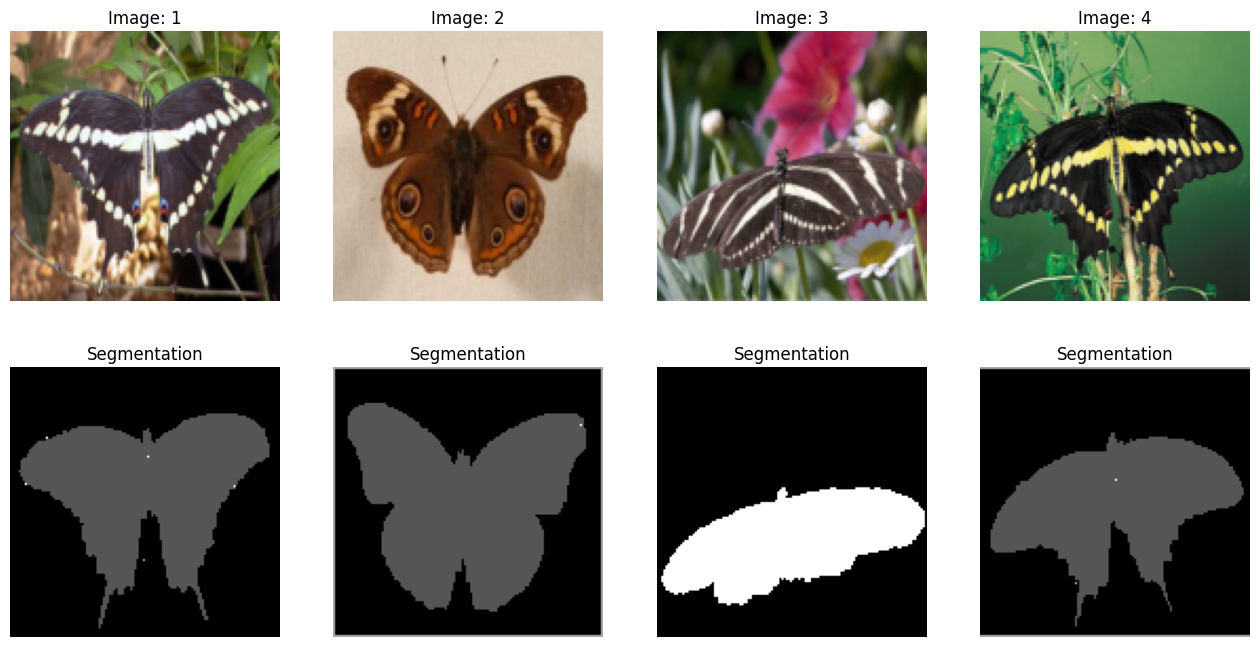

In [4]:
# View some of the images
# Visualize a few of the images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i in range(4):
    image, segmentation, label = train_dataset[i+1]

    # Set the title with the new name
    axs[0, i].imshow(image.permute(1, 2, 0))
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Image: {i+1}")

    # Display the segmentation mask
    axs[1, i].imshow(segmentation.squeeze(), cmap="gray")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Segmentation")

## Tensorboard
Monitor training using Tensorboard.  This code will create a tensorboard session on port 6006 (local host), rather than embedded in the Colab session.

In [5]:
# Define the log directory where your TensorBoard logs are stored
LOG_DIR = "runs"  # Replace with your actual log directory

# Start TensorBoard in the background and bind it to a specific port (6006 here)
import os
os.system(f"tensorboard --logdir {LOG_DIR} --port 6006 &")

# Get the public URL for TensorBoard using Colab's built-in proxy
from google.colab.output import eval_js
tb_url = eval_js("google.colab.kernel.proxyPort(6006)")

# Print the link so you can open it in a new tab
print(f"TensorBoard URL: {tb_url}")

TensorBoard URL: https://4n6f83h49ae-496ff2e9c6d22116-6006-colab.googleusercontent.com/


## Model Implementation + Training

Now you should be all set up.
Next, you'll need to implement
- `homework/train_planner.py`
- `homework/models.py`

And then you're ready to train

In [6]:
# cnn trainer
%load_ext autoreload
%autoreload 2

from trainer import cnn_trainer

cnn_trainer(
    batch_size=64, # seems a bit low as a default, maybe make larger later
    num_epochs=50, # will adjust later
    learning_rate=0.0001,  # default is 1e-4
    weight_decay=1e-4, # default is 1e-4
    pipeline="default",
)


Training CNN model
Epoch 5/50, Train Loss: 1.6065, Val Loss: 1.8372, Val Accuracy: 39.52%
Epoch 10/50, Train Loss: 1.2657, Val Loss: 1.3958, Val Accuracy: 60.48%
Epoch 15/50, Train Loss: 0.9898, Val Loss: 1.0711, Val Accuracy: 67.07%
Epoch 20/50, Train Loss: 0.8035, Val Loss: 1.0102, Val Accuracy: 73.65%
Epoch 25/50, Train Loss: 0.6422, Val Loss: 0.9415, Val Accuracy: 71.86%
Epoch 30/50, Train Loss: 0.5441, Val Loss: 0.9486, Val Accuracy: 71.86%
Epoch 35/50, Train Loss: 0.4352, Val Loss: 0.9794, Val Accuracy: 70.06%
Epoch 40/50, Train Loss: 0.3548, Val Loss: 0.7141, Val Accuracy: 77.84%
Epoch 45/50, Train Loss: 0.2889, Val Loss: 0.7379, Val Accuracy: 76.65%
Epoch 50/50, Train Loss: 0.2546, Val Loss: 0.9931, Val Accuracy: 71.86%


In [7]:
# refreshes python imports automatically when you edit the source file
%load_ext autoreload
%autoreload 2

from trainer import mlp_train

mlp_train(
    batch_size=64, # seems a bit low as a default, maybe make larger later
    num_epochs=50, # will adjust later
    learning_rate=0.0001,  # default is 1e-4
    pipeline="default",
)

# TODO: add weight decay - done
# add dropout to model - done
# simplify model to avoid overfitting


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training MLP model
Epoch 5/50, Train Loss: 1.7888, Val Loss: 1.7807, Val Accuracy: 40.12%
Epoch 10/50, Train Loss: 1.4184, Val Loss: 1.5709, Val Accuracy: 47.90%
Epoch 15/50, Train Loss: 1.1896, Val Loss: 1.4394, Val Accuracy: 50.30%
Epoch 20/50, Train Loss: 0.9647, Val Loss: 1.3939, Val Accuracy: 53.89%
Epoch 25/50, Train Loss: 0.7553, Val Loss: 1.3217, Val Accuracy: 55.69%
Epoch 30/50, Train Loss: 0.6073, Val Loss: 1.3524, Val Accuracy: 56.29%
Epoch 35/50, Train Loss: 0.5061, Val Loss: 1.4001, Val Accuracy: 55.69%
Epoch 40/50, Train Loss: 0.3784, Val Loss: 1.2407, Val Accuracy: 59.28%
Epoch 45/50, Train Loss: 0.2927, Val Loss: 1.3232, Val Accuracy: 56.89%
Epoch 50/50, Train Loss: 0.1965, Val Loss: 1.2950, Val Accuracy: 60.48%


In [6]:
# train U-NET for segmentation
%load_ext autoreload
%autoreload 2
" to be completed"

' to be completed'

## Git Version Update Code

Updates and pushes changes made in Colab.


In [ ]:
%ls
!git status

!git config --global user.email "GITHUB_EMAIL"
!git config --global user.name "GITHUB_USER"

!git add models.py
!git add trainer.py
!git add data_loader.py
!git add main.ipynb
!git add README.md
!git add runs/*
!git commit -m "update"
!git push origin main
!git status

butterfly-dataset.zip  dataset/    models.py     README.md  trainer.py
data_loader.py         main.ipynb  __pycache__/  runs/
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    runs/Dec31_20-52-07_e59d3dc27793/events.out.tfevents.1735678327.e59d3dc27793.1582.0
	deleted:    runs/Dec31_20-55-25_e59d3dc27793/events.out.tfevents.1735678525.e59d3dc27793.1582.1
	deleted:    runs/Jan01_19-11-25_9c3c4b2f5e72/events.out.tfevents.1735758685.9c3c4b2f5e72.259.0
	deleted:    runs/Jan01_19-18-08_9c3c4b2f5e72/events.out.tfevents.1735759088.9c3c4b2f5e72.259.1
	deleted:    runs/Jan02_09-44-29_Mr_Bear/events.out.tfevents.1735829069.Mr_Bear.21092.0

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	butterfly-dataset.zip
	runs/Jan02_16-09-52_df72ba3175f0/
	runs/Jan02_16-17-03_df72ba317

## Tensorboard (Optional)
This will run tensorboard within the Colab environment GUI window tab.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs